In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set()
warnings.filterwarnings('ignore')


In [2]:
# Loading the CSV file into a DataFrame
df = pd.read_csv('Cleaning data.csv')
df

,status,founded_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,...,ISR,NLD,RUS,SGP,SWE,USA,other.1,isClosed,Age_in_Days,Age_in_Days.1
0,operating,2005.0,9.010471,2005.0,2008.0,3.0,39750000.0,2010.000000,2013.000000,5.000000,...,False,False,False,False,False,True,False,1.0,6935.0,6935.0
1,acquired,2007.0,9.010471,2008.0,2008.0,1.0,5000000.0,2008.000000,2012.000000,3.000000,...,False,False,False,False,False,True,False,0.0,0.0,0.0
2,operating,2007.0,9.010471,2008.0,2013.0,5.0,68069200.0,2010.164879,2011.046642,1.703825,...,False,False,False,False,False,True,False,1.0,6205.0,6205.0
3,operating,2003.0,9.010471,2011.0,2012.0,3.0,10125293.0,2010.000000,2010.000000,1.000000,...,False,False,False,False,False,True,False,1.0,7665.0,7665.0
4,operating,2006.0,9.010471,2008.0,2013.0,3.0,33000000.0,2010.000000,2013.000000,3.000000,...,False,False,False,False,False,True,False,1.0,6570.0,6570.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20462,closed,2008.0,9.010471,2008.0,2008.0,1.0,130000.0,2008.000000,2009.000000,2.000000,...,False,False,False,False,False,True,False,0.0,0.0,0.0
20463,operating,2011.0,9.010471,2011.0,2011.0,1.0,500000.0,2011.000000,2011.000000,1.000000,...,False,False,False,False,False,False,False,1.0,4745.0,4745.0
20464,closed,2006.0,9.010471,2008.0,2009.0,2.0,1100000.0,2005.000000,2008.000000,2.000000,...,False,False,False,False,False,True,False,0.0,0.0,0.0
20465,operating,2007.0,9.010471,2008.0,2008.0,1.0,750000.0,2013.000000,2013.000000,1.000000,...,False,False,False,False,False,True,False,1.0,6205.0,6205.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20467 entries, 0 to 20466
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   status              20467 non-null  object 
 1   founded_at          20467 non-null  float64
 2   investment_rounds   20467 non-null  float64
 3   first_funding_at    20467 non-null  float64
 4   last_funding_at     20467 non-null  float64
 5   funding_rounds      20467 non-null  float64
 6   funding_total_usd   20467 non-null  float64
 7   first_milestone_at  20467 non-null  float64
 8   last_milestone_at   20467 non-null  float64
 9   milestones          20467 non-null  float64
 10  relationships       20467 non-null  float64
 11  lat                 20467 non-null  float64
 12  lng                 20467 non-null  float64
 13  analytics           20467 non-null  bool   
 14  biotech             20467 non-null  bool   
 15  cleantech           20467 non-null  bool   
 16  ecom

In [4]:
columns_target = df.select_dtypes(['float64','object'])
columns_target.columns

Index(['status', 'founded_at', 'investment_rounds', 'first_funding_at',
       'last_funding_at', 'funding_rounds', 'funding_total_usd',
       'first_milestone_at', 'last_milestone_at', 'milestones',
       'relationships', 'lat', 'lng', 'isClosed', 'Age_in_Days',
       'Age_in_Days.1'],
      dtype='object')

In [5]:
#Making Independent Features
train_features = columns_target.columns.tolist()
del train_features[0]
train_features

['founded_at',
 'investment_rounds',
 'first_funding_at',
 'last_funding_at',
 'funding_rounds',
 'funding_total_usd',
 'first_milestone_at',
 'last_milestone_at',
 'milestones',
 'relationships',
 'lat',
 'lng',
 'isClosed',
 'Age_in_Days',
 'Age_in_Days.1']

In [6]:
#Eliminating 'status' as it relates to 'isClosed'
del train_features[12]
train_features

['founded_at',
 'investment_rounds',
 'first_funding_at',
 'last_funding_at',
 'funding_rounds',
 'funding_total_usd',
 'first_milestone_at',
 'last_milestone_at',
 'milestones',
 'relationships',
 'lat',
 'lng',
 'Age_in_Days',
 'Age_in_Days.1']

In [7]:
#Eliminating 'Age_in_Days.1' as it is just the replication of 'Age_in_Days'
del train_features[13]
train_features

['founded_at',
 'investment_rounds',
 'first_funding_at',
 'last_funding_at',
 'funding_rounds',
 'funding_total_usd',
 'first_milestone_at',
 'last_milestone_at',
 'milestones',
 'relationships',
 'lat',
 'lng',
 'Age_in_Days']

In [8]:
#Eliminating 'founded_at' as it relates to 'Age_in_Days'
del train_features[0]
train_features

['investment_rounds',
 'first_funding_at',
 'last_funding_at',
 'funding_rounds',
 'funding_total_usd',
 'first_milestone_at',
 'last_milestone_at',
 'milestones',
 'relationships',
 'lat',
 'lng',
 'Age_in_Days']

In [9]:
X = df[train_features]
y = df['status']

In [10]:
# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

In [11]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Initializing the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)


In [13]:
# Training the model
gb_clf.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=42)

In [14]:
# Predicting on the test set
y_pred = gb_clf.predict(X_test_scaled)

In [15]:
# Calculating the scores on test set

test_accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, gb_clf.predict(X_train_scaled))
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


In [16]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function plots the confusion matrix.
    
    Parameters:
        cm (array-like): Confusion matrix.
        classes (list): List of class labels.
        normalize (bool): Whether to normalize the confusion matrix or not.
        title (str): Title of the plot.
        cmap (matplotlib.colors.Colormap): Colormap used for visualization.
    """
    # Plotting the confusion matrix
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.xticks(range(cm.shape[0]))
    plt.yticks(range(cm.shape[1]))

    # Normalizing the confusion matrix if required
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
    else:
        cm = cm

    # Setting threshold for text color
    thresh = cm.max() / 2.
    
    # Adding text annotations to the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    # Formatting the plot
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [17]:
print("Test Accuracy:", test_accuracy)
print("Train Accuracy:", train_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

Test Accuracy: 0.95847581827064
Train Accuracy: 0.9612166371465217
Precision: 0.9544098909175113
Recall: 0.95847581827064
F1-score: 0.9550642073015492
Mean Absolute Error: 0.04152418172936004
Mean Squared Error: 0.04152418172936004


In [18]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       337
           1       0.82      0.66      0.73       230
           2       0.39      0.17      0.24        53
           3       0.99      1.00      0.99      3474

    accuracy                           0.96      4094
   macro avg       0.75      0.68      0.70      4094
weighted avg       0.95      0.96      0.96      4094



Confusion Matrix:


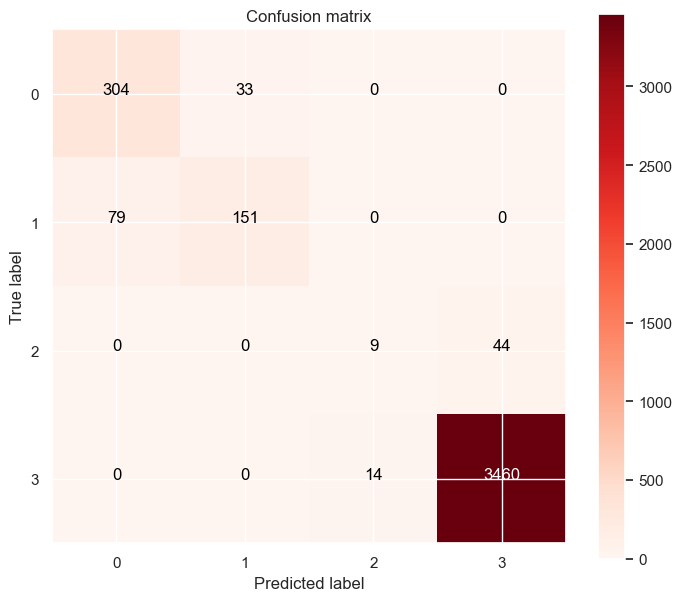

In [19]:
print("Confusion Matrix:")
conf_mat = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
fig1 = plt.figure(figsize=(7, 6))
plot_confusion_matrix(conf_mat, classes=np.unique(y_train), title='Confusion matrix')

In [20]:
# Creating a DataFrame to store the evaluation metrics
model_result = pd.DataFrame({
    'test accuracy': test_accuracy,
    'train accuarcy': train_accuracy,
    'precision score': precision,
    'recall score': recall,
    'mse': mse,
    'mae': mae,
    'F_1 score': f1
}, index=['GB_normal'])

model_result

,test accuracy,train accuarcy,precision score,recall score,mse,mae,F_1 score
GB_normal,0.958476,0.961217,0.95441,0.958476,0.041524,0.041524,0.955064
